In [1]:
# Import
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import datetime as DT
import pandas as pd
import math
import scipy
from IPython.core.debugger import Tracer
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.classification import log_loss

from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

%matplotlib inline
import seaborn as sns; sns.set()
import operator
import itertools
import matplotlib.patches as mpatches
from scipy.stats.stats import pearsonr
import utils as ut

import warnings
warnings.filterwarnings('ignore')
#Tracer()()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 5000;

<IPython.core.display.Javascript object>

In [3]:
#Display full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
def processfile(csv):
    #load data
    df = pd.read_csv(csv, header= 0)
    #l df["pct_matched_cat"]
    #df_y["pct_matched_cat"]
    return df

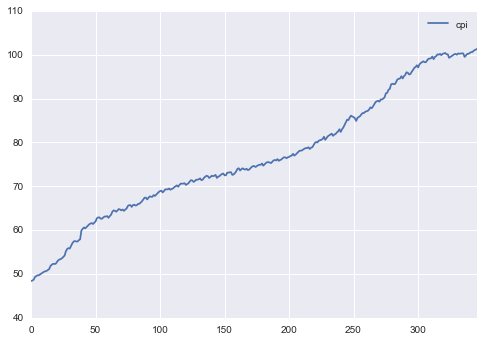

In [56]:
df= processfile('/Users/david/notebooks/data/ukcpi.csv')
#ut.dispdf(df, 10, num=10, cols=10)
df = df[[df.columns[27],df.columns[0]]]
df = df[493:].reset_index(drop=True)
df["cpi"] = df[df.columns[0]].apply(lambda x: float(x))
del df[df.columns[0]]
df["date"] = pd.to_datetime(df["Title"], infer_datetime_format=True)
del df["Title"]

#ut.printfull(df)
df.plot()

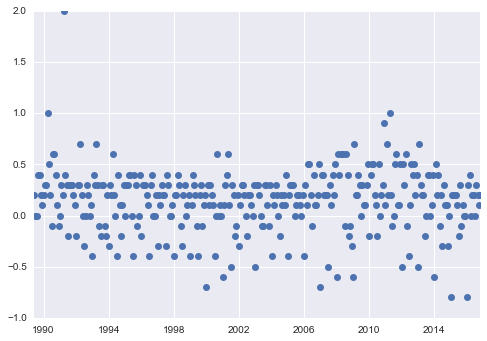

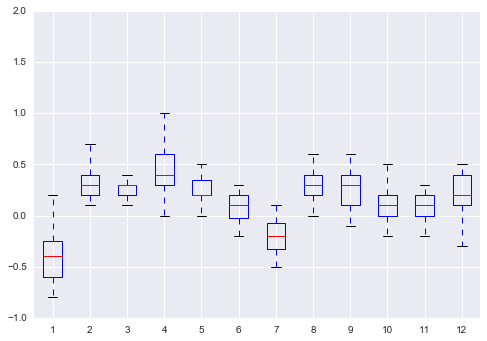

In [77]:
#df["cpi"]
df["mom"] = df["cpi"] - df["cpi"].shift(1)
df["month"] = df["date"].apply(lambda x: x.month)
df = df.dropna()
d_ar =[]
i_ar =[]
data_ar =[]
min_ar =[]
for i, d in df.groupby(["month"]):
    i_ar.append(i)
    d_ar.append(d["mom"].mean())
    data_ar.append(d["mom"].values)
    min_ar.append(d["mom"].min())

plt.plot_date(df["date"], df["mom"])
plt.show()
_ = plt.boxplot(data_ar)


In [67]:
i_ar
d_ar

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

[cpi      76.275000
 mom      -0.371429
 month     1.000000
 dtype: float64, cpi      76.610714
 mom       0.335714
 month     2.000000
 dtype: float64, cpi      76.875000
 mom       0.264286
 month     3.000000
 dtype: float64, cpi      77.360714
 mom       0.485714
 month     4.000000
 dtype: float64, cpi      77.617857
 mom       0.257143
 month     5.000000
 dtype: float64, cpi      77.689286
 mom       0.071429
 month     6.000000
 dtype: float64, cpi      77.489286
 mom      -0.200000
 month     7.000000
 dtype: float64, cpi      76.837931
 mom       0.306897
 month     8.000000
 dtype: float64, cpi      77.103448
 mom       0.265517
 month     9.000000
 dtype: float64, cpi      77.200000
 mom       0.096552
 month    10.000000
 dtype: float64, cpi      77.268966
 mom       0.068966
 month    11.000000
 dtype: float64, cpi      76.646429
 mom       0.239286
 month    12.000000
 dtype: float64]